In [1]:
import ssl
print(ssl.get_default_verify_paths())

DefaultVerifyPaths(cafile=None, capath=None, openssl_cafile_env='SSL_CERT_FILE', openssl_cafile='/Library/Frameworks/Python.framework/Versions/3.12/etc/openssl/cert.pem', openssl_capath_env='SSL_CERT_DIR', openssl_capath='/Library/Frameworks/Python.framework/Versions/3.12/etc/openssl/certs')


In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"mnist train data has total images of {len(X_train)}")
print(f"mnist test data has total images of {len(X_test)}")


/Users/baijuyadav/Desktop/deeplearningfromscratch/deeplearningscratch/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


mnist train data has total images of 60000
mnist test data has total images of 10000


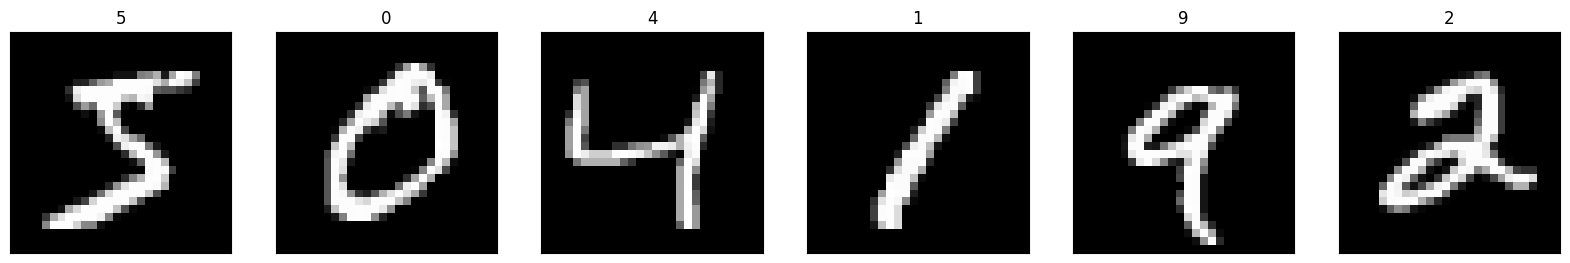

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib.cm as cm 
import numpy as np 
fig = plt.figure(figsize=(20,20))
for i in range(6):
  ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
  ax.imshow(X_train[i],cmap="gray")
  ax.set_title(str(y_train[i]))
  

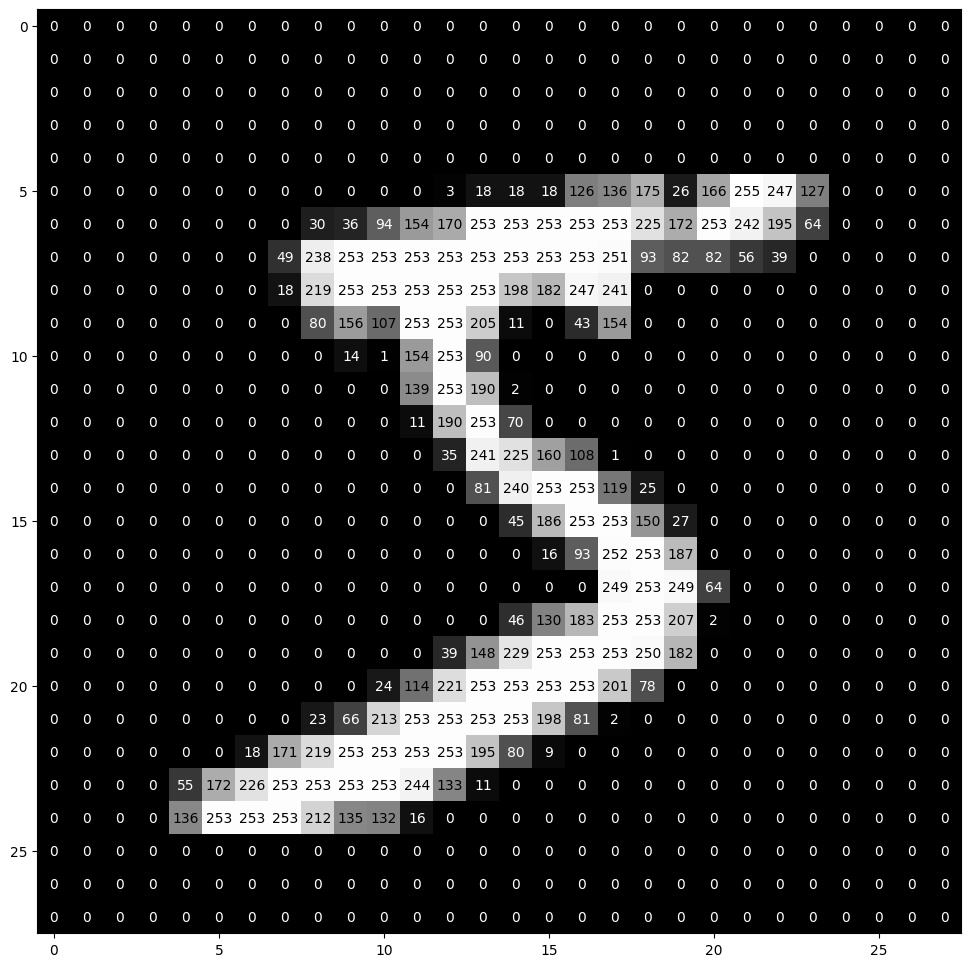

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [4]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [7]:
from keras import utils
num_classes = 10 
print('Integer-valued labels: ')
print(y_train[:10])

y_train = utils.to_categorical(y_train,num_classes)
y_test = utils.to_categorical(y_test,num_classes)

print("one-hot labels: ")
print(y_train[:10])

Integer-valued labels: 
[5 0 4 1 9 2 1 3 1 4]
one-hot labels: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:
img_rows,img_cols = 28,28
X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows,img_cols,1)
print("input_shape :",input_shape)
print("x_train shape : ",X_train.shape)

input_shape : (28, 28, 1)
x_train shape :  (60000, 28, 28, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="same",activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(rate=0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10,activation="softmax"))
model.summary()

/Users/baijuyadav/Desktop/deeplearningfromscratch/deeplearningscratch/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,442 (1.54 MB)

 Trainable params: 402,442 (1.54 MB)

 Non-trainable params: 0 (0.00 B)